In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import seaborn as sns
import apikeys
import json
import requests as req
import numpy as np
import matplotlib.pyplot as plt
import re
from tracklist import track_list
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# Initialize Sentiment Analyzer

#tracks_sample_list = [{"artist": "Lady Gaga", "title": "Bad Romance", "genre": "pop"}]

#Dicts to collect API data
for track in track_list:
        url = "https://api.musixmatch.com/ws/1.1/matcher.lyrics.get?format=json&q_track=" + track['artist'] + "&q_artist=" + track['title'] + '&apikey=2ad42aad9e1f1628b2418c17e486f84b'
        response_json = req.get(url).json()
        try:
                lyrics = response_json['message']['body']['lyrics']['lyrics_body'].replace("\n", ' ')
                lyrics = lyrics.replace("******* This Lyrics is NOT for Commercial use *******", '')
                track.update({'lyrics': lyrics})
        except:
                print (track, response_json)

with open('tracks_lyrics.json', 'w') as fout:
    json.dump(track_list, fout)

In [4]:
analyzer = SentimentIntensityAnalyzer()
sentiments = []

In [5]:
with open('tracks_lyrics.json') as data_file:
    data = json.load(data_file)
    for x in data:
        try:
            words = x['lyrics']
            scores = analyzer.polarity_scores(words)
            compound = scores['compound']
            pos = scores['pos']
            neu = scores['neu']
            neg = scores['neg']

            # Add sentiments for each tweet into `sentiments` list
            sentiments.append({"Song": (['title']), 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg})
        except:
            next(x)



In [6]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
print(sentiments_pd)

     Compound  Negative  Neutral  Positive     Song
0      0.9980     0.496    0.069     0.436  [title]
1      0.7146     0.789    0.090     0.122  [title]
2     -0.1670     0.580    0.215     0.205  [title]
3      0.4404     0.828    0.072     0.101  [title]
4      0.6114     0.716    0.123     0.162  [title]
5      0.4728     0.893    0.047     0.061  [title]
6      0.9701     0.794    0.017     0.190  [title]
7     -0.6662     0.697    0.164     0.139  [title]
8      0.6870     0.794    0.055     0.151  [title]
9      0.9513     0.792    0.044     0.164  [title]
10    -0.9219     0.881    0.119     0.000  [title]
11    -0.0654     0.819    0.092     0.089  [title]
12    -0.9639     0.766    0.165     0.069  [title]
13     0.9627     0.875    0.000     0.125  [title]
14     0.9790     0.698    0.022     0.279  [title]
15     0.9810     0.693    0.024     0.283  [title]
16     0.4427     0.796    0.090     0.114  [title]
17     0.9781     0.699    0.015     0.285  [title]
18    -0.533

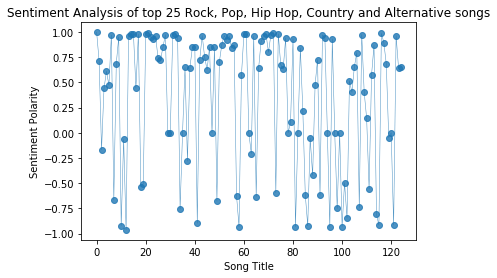

In [7]:
# Create plot
plt.plot(sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Add title and labels
plt.title(f"Sentiment Analysis of top 25 Rock, Pop, Hip Hop, Country and Alternative songs")
plt.ylabel("Sentiment Polarity")
plt.xlabel("Song Title")
plt.show()